# 1 - a 
![WhatsApp Image 2022-06-01 at 8 10 03 PM](https://user-images.githubusercontent.com/47869761/173117303-781e19aa-d06e-4ff1-aee9-b2fff883eae1.jpeg)


# 1 - b
![WhatsApp Image 2022-06-01 at 8 20 31 PM](https://user-images.githubusercontent.com/47869761/173119464-05b3a8ee-16f5-4fae-ae0d-cb7ca7ae40c7.jpeg)


# 1 - c

In [82]:
import numpy as np

from cvxopt import matrix, solvers
# given data
X = np.array([[0., 0.], [0., -1.], [-2., 0.]])
y = np.array([-1., -1., 1.]).reshape(-1,1)
# reference: https://python.plainenglish.io/introducing-python-package-cvxopt-implementing-svm-from-scratch-dc40dda1da1f
# reference: https://xavierbourretsicotte.github.io/SVM_implementation.html
# reference: https://cvxopt.org/examples/tutorial/qp.html
P = matrix(y * X @ (y * X).T)
q = matrix(-np.ones((3, 1)))
G = matrix(np.vstack((np.identity(3)*-1,np.identity(3))))
h = matrix(np.hstack((np.zeros(3), np.ones(3))))
A = matrix(y.reshape(1, -1))
b = matrix(np.zeros(1))
#define a solver
sol = solvers.qp(P, q, G, h, A, b)
#find alphas
print(sol['x'])
# first is w1, second is w2, last one is b

     pcost       dcost       gap    pres   dres
 0: -4.6914e-01 -4.0864e+00  4e+00  1e-16  7e-16
 1: -4.8281e-01 -6.3400e-01  2e-01  8e-17  3e-16
 2: -4.9677e-01 -5.0962e-01  1e-02  2e-16  4e-17
 3: -4.9956e-01 -5.0059e-01  1e-03  1e-16  4e-17
 4: -4.9994e-01 -5.0007e-01  1e-04  1e-16  7e-17
 5: -4.9999e-01 -5.0001e-01  2e-05  6e-17  5e-17
 6: -5.0000e-01 -5.0000e-01  3e-06  2e-16  6e-17
 7: -5.0000e-01 -5.0000e-01  4e-07  2e-16  1e-16
Optimal solution found.
[ 4.99e-01]
[ 5.94e-04]
[ 5.00e-01]



### Results show that w1 = -0.5, w2 = 0, b = -0.5
### If we scale these numbers by multiplying with 2 we will get the result we obtained in (b) section.


# 1 - d

### train-predict functions

In [87]:
from PIL import Image, ImageOps
from numpy import array, asarray
import numpy as np, pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from cvxopt import matrix, solvers
from sklearn import svm
import pickle



def svm_train_dual(X, Y):
    y = Y.reshape(-1, 1) * 1.
    n,d = X.shape
    Q = np.identity(d+1)
    Q[0][0] = 0
    Q = matrix(Q)
    p = matrix(np.zeros(d+1))
    c = matrix(np.ones(n))
    A = []
    for _x, _y in zip(X,y):
        if _y < 0:
            _a = [*_y, *-_x]
        else:
            _a = [*_y, *_x]
        A.append(np.array(_a))
    A = np.array(A)

    print(A.shape)
    A = A.astype(np.double)
    A = matrix(A)
    # define a solver
    #sol = solvers.qp(P, q, G, h, A, b)
    sol = solvers.qp(Q,p,A,c)
    with open('sol.pkl', 'wb') as handle:
      pickle.dump(sol, handle, protocol=pickle.HIGHEST_PROTOCOL)
    return sol['x'][1:], sol['x'][0]


def predict(X, y, W, b):
    right_pred = 0
    length = X.shape[0]
    for i in range(length):
        y_pred = np.sign(np.array(X[i]).T @ W + b)[0]
        if y_pred == y[i]:
            right_pred = right_pred + 1
    accuracy = right_pred / length
    return accuracy


In [84]:
""" to load files from drive to colab environment
! gdown --id 154idaHx-5YMxbke4dCInF-0z17W9LUwu
! gdown --id 1LqVKfOKDHEPcM1sR4X7M0qxUbyXdEWBU
! gdown --id 1BUO6ojkMneIzKjlGZkl5f4vUOfK1iT4a
! gdown --id 19lrNcCUpEmzf8McDMyCQqn4qWb7tLRsM
import zipfile
with zipfile.ZipFile("/content/Archive.zip","r") as zip_ref:
    zip_ref.extractall("/content/")
"""

' to load files from drive to colab environment\n! gdown --id 154idaHx-5YMxbke4dCInF-0z17W9LUwu\n! gdown --id 1LqVKfOKDHEPcM1sR4X7M0qxUbyXdEWBU\n! gdown --id 1BUO6ojkMneIzKjlGZkl5f4vUOfK1iT4a\n! gdown --id 19lrNcCUpEmzf8McDMyCQqn4qWb7tLRsM\nimport zipfile\nwith zipfile.ZipFile("/content/Archive.zip","r") as zip_ref:\n    zip_ref.extractall("/content/")\n'

### prepare x and y values


In [85]:
image_matrix = []
image_test_matrix = []

for i in range(1000):
    im = Image.open("3dshapes_test/" + str(i) + ".jpg")
    gray_image = ImageOps.grayscale(im)
    g_array = array(gray_image)
    fg = g_array.flatten()
    fg = fg.reshape(1, 4096)
    image_test_matrix.append(fg[0])

image_test_matrix = asarray(image_test_matrix, dtype='float64')

for j in range(10000):
    im = Image.open("3dshapes_train/" + str(j) + ".jpg")
    gray_image = ImageOps.grayscale(im)

    g_array = array(gray_image)
    fg = g_array.flatten()
    fg = fg.reshape(1, 4096)

    image_matrix.append(fg[0])

# image_matrix is the desired matrix of size 10000x4096 PART A
image_matrix = asarray(image_matrix, dtype='float64')


yvalues = np.load('orientations_train.npy')
y_testvalues = np.load('orientations_test.npy')
twoclass_yvalues = np.array([(1 if i > 0 else -1) for i in yvalues])
twoclass_y_testvalues = np.array([(1 if i > 0 else -1) for i in y_testvalues])

#### no pca


In [88]:
X = image_matrix
X_test = image_test_matrix
W, b = svm_train_dual(X, twoclass_yvalues)
print("accuracy:",predict(X_test, twoclass_y_testvalues, W, b))


(10000, 4097)
     pcost       dcost       gap    pres   dres
 0:  1.3334e-02 -1.4330e-02  1e+04  1e+00  8e+06
 1:  2.3278e-04 -1.2580e+02  1e+02  1e-02  1e+05
 2:  5.6810e-07 -1.3305e+00  1e+00  1e-04  1e+03
 3:  6.6279e-08 -1.4048e-02  1e-02  1e-06  1e+01
 4:  1.1770e-08 -1.6125e-04  2e-04  2e-08  1e-01
 5:  4.9063e-10 -1.8735e-06  2e-06  2e-10  1e-03
 6:  2.9941e-12 -2.3328e-08  2e-08  2e-12  1e-05
 7:  3.0370e-16 -2.3368e-10  2e-10  2e-14  1e-07
 8:  3.0370e-20 -2.3368e-12  2e-12  3e-15  1e-09
Optimal solution found.
accuracy: 0.494


### pca n = 2

In [89]:
# n_components can change according to desired feature number
pca2 = PCA(n_components=2)
pca2.fit(image_matrix)
image_matrix_reducted = pca2.transform(image_matrix)
test_values_reducted = pca2.transform(image_test_matrix)
X = image_matrix_reducted
X_test = test_values_reducted

W, b = svm_train_dual(X, twoclass_yvalues)
print("explained variance ratio:", sum(pca2.explained_variance_ratio_))
print("accuracy:",predict(X_test, twoclass_y_testvalues, W, b))


(10000, 3)
     pcost       dcost       gap    pres   dres
 0:  4.2283e-12 -1.0746e+04  1e+04  7e-17  2e+05
 1:  4.2283e-12 -1.0746e+02  1e+02  2e-16  2e+03
 2:  4.2283e-12 -1.0746e+00  1e+00  2e-16  2e+01
 3:  4.2283e-12 -1.0746e-02  1e-02  2e-16  2e-01
 4:  4.2277e-12 -1.0747e-04  1e-04  2e-16  2e-03
 5:  4.1692e-12 -1.0795e-06  1e-06  2e-16  2e-05
 6:  1.2778e-12 -1.3448e-08  1e-08  2e-16  2e-07
 7:  1.6492e-16 -1.3717e-10  1e-10  2e-16  2e-09
Optimal solution found.
explained variance ratio: 0.7028516596887746
accuracy: 0.506


### pca n = 50

In [90]:
# n_components can change according to desired feature number
pca50 = PCA(n_components=50)
pca50.fit(image_matrix)
image_matrix_reducted = pca50.transform(image_matrix)
test_values_reducted = pca50.transform(image_test_matrix)
X = image_matrix_reducted
X_test = test_values_reducted
print("y values and counts:",np.unique(twoclass_yvalues,return_counts=True))

y values and counts: (array([-1,  1]), array([5336, 4664]))


In [91]:
W, b = svm_train_dual(X, twoclass_yvalues)
print("explained variance ratio:", sum(pca50.explained_variance_ratio_))
print("accuracy:",predict(X_test, twoclass_y_testvalues, W, b))


(10000, 51)
     pcost       dcost       gap    pres   dres
 0:  7.4116e-06 -9.4392e+02  3e+04  2e+00  9e+06
 1:  1.3443e-06 -3.5586e+03  4e+03  2e-01  1e+06
 2:  3.2700e-06 -6.8037e+01  7e+01  3e-03  2e+04
 3:  3.3139e-06 -6.8164e-01  7e-01  3e-05  2e+02
 4:  3.3064e-06 -6.9572e-03  7e-03  3e-07  2e+00
 5:  2.6975e-06 -1.7961e-04  2e-04  7e-09  4e-02
 6:  7.0221e-07 -8.1674e-06  9e-06  1e-10  8e-04
 7:  2.8031e-08 -6.3041e-07  7e-07  3e-12  2e-05
 8:  4.3443e-11 -1.9451e-08  2e-08  5e-14  3e-07
 9:  4.6899e-15 -1.9988e-10  2e-10  5e-16  3e-09
Optimal solution found.
explained variance ratio: 0.9845905550049798
accuracy: 0.494


# 1 - e

## library svm with pca


In [92]:
# n_components can change according to desired feature number
pca50 = PCA(n_components=50)
pca50.fit(image_matrix)
image_matrix_reducted = pca50.transform(image_matrix)
test_values_reducted = pca50.transform(image_test_matrix)
X = image_matrix_reducted
X_test = test_values_reducted
print("y values and counts:",np.unique(twoclass_yvalues,return_counts=True))

y values and counts: (array([-1,  1]), array([5336, 4664]))


In [93]:
classifier = svm.SVC()
classifier.fit(X, twoclass_yvalues)
y_pred = classifier.predict(X_test)
count = 0
for i in range(len(y_pred)):
    if twoclass_y_testvalues[i] != y_pred[i]:
        count += 1

percentage = float(100 - float((count / X_test.shape[0]) * 100))/100
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], count))
print("Test classification accuracy: %.2f" % percentage)

Number of mislabeled points out of a total 1000 points : 7
Test classification accuracy: 0.99


### library svm without pca

In [94]:
X = image_matrix
X_test = image_test_matrix
classifier = svm.SVC()
classifier.fit(X, twoclass_yvalues)
y_pred = classifier.predict(X_test)
count = 0
for i in range(len(y_pred)):
    if twoclass_y_testvalues[i] != y_pred[i]:
        count += 1

percentage = float(100 - float((count / X_test.shape[0]) * 100))/100
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], count))
print("Test classification accuracy: %.2f" % percentage)

Number of mislabeled points out of a total 1000 points : 0
Test classification accuracy: 1.00


* It's way faster than cvxopt library
* Also we do not waste time on preparing Q,P,A,c variables.
* According to the [official documentation](https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation), SVC converts soft margin primal problem to dual problems. Then implicitly maps training vectors to higher dimension using kernel trick. (rbf is default kernel trick function).
    * We also used linear kernel trick option, and it did better than rbf.
* Once it solves the optimization problem, it gives the decision functions as sum of (y[i] * alpha[i] * K(x[i],x))+b

# 1 - f

## library svm with multiclass


In [95]:
unique_list_y = list(set(yvalues))
unique_list_y_test = list(set(y_testvalues))
encoded_yvalues = np.array([unique_list_y.index(i) for i in yvalues])
encoded_y_testvalues = np.array([unique_list_y_test.index(i) for i in y_testvalues])


### library svm multiclass without kernel trick

In [96]:
X = image_matrix
X_test = image_test_matrix
classifier = svm.SVC()
classifier.fit(X, encoded_yvalues)
y_pred = classifier.predict(X_test)
#print(y_pred)
count = 0
for i in range(len(y_pred)):
    if encoded_y_testvalues[i] != y_pred[i]:
        count = count + 1
percentage = float(100 - float((count / X_test.shape[0]) * 100))/100
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], count))
print("Test classification accuracy: %.2f" % percentage)

Number of mislabeled points out of a total 1000 points : 4
Test classification accuracy: 1.00


### library svm multiclass with linear kernel

In [97]:
X = image_matrix
X_test = image_test_matrix
classifier = svm.SVC(kernel="linear")
classifier.fit(X, encoded_yvalues)
y_pred = classifier.predict(X_test)
#print(y_pred)

count = 0

for i in range(len(y_pred)):
    if encoded_y_testvalues[i] != y_pred[i]:
        count = count + 1

percentage = float(100 - float((count / X_test.shape[0]) * 100))/100
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], count))
print("Test classification accuracy: %.2f" % percentage)

Number of mislabeled points out of a total 1000 points : 0
Test classification accuracy: 1.00


* Here we get 0.97 accuracy score with rbf kernel and 1.00 accuracy score with linear kernel. Our best accuracy in phase-2 was 0.94 in 5-fold average of logistic regression.
* There is a slight improvement with SVM with kernel-trick.

# 1 - g

* Our features were already obtained from Pca from phase 2.
* We applied PCA with 2 and 50 number of components. Explained variance ratios are 0.7 and 0.98 respectively.
* Computation time without applying PCa before SVM is much more since it uses more features.

# 1 - h
* Best classifiers are sklearn SVM without PCA. 
* Since we lose some of the information with PCA, it's normal that it reduces accuracy. But there is a tradeoff here: We gain from computation time.

# 2 - a Gaussian Mixture Models

In [98]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [99]:
# central limit theorem
def inverse_sigmoid(values):
    # if y = 1/(1+exp(-x)) then x = ln(y/(1-y))
    return np.log(values/(1-values))


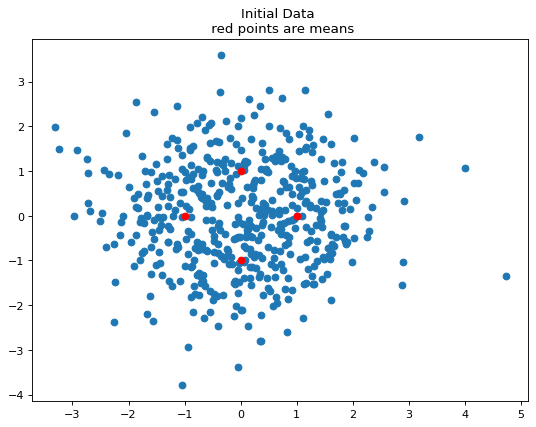

In [100]:
def SampleGaussianMixture(size):
    """ 
    Generates dataset by sampling Gaussian mixture distribution.
      Mean and weights of the distributions are given below.
    Size of the dataset is determined by 'size' argument.
    """
    mu = [np.array([0, 1]), np.array([1, 0]),np.array([-1, 0]),np.array([0, -1])]
    cov = np.array([[1, 0], [0, 1]])
    pi = 0.25
    cumulative_pi = [0.25,0.5,0.75,1]
    X = []
    for i in range(size):
        r = np.random.uniform(0, 1)
        for i, cdf in enumerate(cumulative_pi):
            if r < cdf:
                break
        selected_mu = mu[i]
        eigvals, eigvecs = np.linalg.eig(cov)
        dimensions = len(eigvals)
        # sampling from normal distribution
        # transforming into multivariate distribution
        y_s = np.random.uniform(0, 1, size=(dimensions*1, 4))
        x_normal = np.mean(inverse_sigmoid(y_s), axis=1).reshape((-1, dimensions))
        X.append(((x_normal*eigvals) @ eigvecs + selected_mu)[0].tolist())
    plt.figure(figsize=(8, 6), dpi=80)
    plt.scatter(np.array(X)[:,0], np.array(X)[:,1])
    plt.scatter([0,0,1,-1],[-1,1,0,0], c='red')
    plt.title("Initial Data \n red points are means")
    plt.show()
    return np.array(X)
gaussian_mixture = SampleGaussianMixture(size=500)

# 2 - b k-Means Clustering

In [101]:
def euclideanDistSquared(point1, point2):
    """returns the euclidean distance between two points regardless of dimensionality"""
    return sum([(dim_of_first - dim_of_second)**2 for dim_of_first, dim_of_second in zip(point1, point2)])

In [102]:
def kMeansInitialize(dataset, k, seed):
    """ 
    First generates 'k' number of random centroids. Then labels dataset. 
    Then calculates new positions of centroids by taking the average of the data points belong to them. 
    If a centroid does not attract any data point, function returns -1 and called again.
    Finally plots the initial positions of the centroids and the labeled datasets.
    """
    np.random.seed(seed)

    # initialize centroids randomly
    centroids = np.random.rand(k, 2)  # rand creates numbers between 0 and 1
    # map [0,1] to [min of datapoints, max of datapoints] for x axis
    centroids[:, 0] = centroids[:, 0] * \
        (max(dataset[:, 0])-min(dataset[:, 0])) + min(dataset[:, 0])
    # map [0,1] to [min of datapoints, max of datapoints] for y axis
    centroids[:, 1] = centroids[:, 1] * \
        (max(dataset[:, 1])-min(dataset[:, 1])) + min(dataset[:, 1])
    centroid_labels = np.array([i for i in range(k)])

    # label datasets according to the closest centroid
    dataset_labels = np.zeros(len(dataset), dtype=int)
    point_idx = 0
    for point in dataset:
        centroid_idx = 0
        min_distance = math.inf
        for cluster_center in centroids:
            if(euclideanDistSquared(cluster_center, point) < min_distance):
                min_distance = euclideanDistSquared(cluster_center, point)
                dataset_labels[point_idx] = centroid_idx
            centroid_idx += 1
        point_idx += 1

    # if a centroid did not attract any data point return -1 so that caller function can call this function again.
    for i in range(k):
        if (dataset_labels == i).sum() == 0:
            return -1

    # update centroids by taking the average of datapoints belong to them
    new_centroid_sums = [0]*k
    point_idx = 0
    for point in dataset:
        new_centroid_sums[dataset_labels[point_idx]] += point
        point_idx += 1
    centroids = np.array([new_centroid_sums[i] / (dataset_labels == i).sum()
                         for i in range(k)], dtype=float)

    return centroids, centroid_labels, dataset_labels

In [103]:
def plotTwoDimensionalWithOptionalColors(title, data1, data2, data1_for_color, data2_for_color):
    """
    This function plots two different dataset to one figure. 
    First parameter is the name of the plot.
    Second parameter is "dataset", third parameter is "centroids".
    fourth and fifth parameters are for coloring.
    """
    plt.figure(figsize=(8, 6), dpi=80)
    plt.scatter(data1[:, 0], data1[:, 1], c=data1_for_color, vmin=min(
        data1_for_color), vmax=max(data1_for_color), cmap='tab20')
    plt.scatter(data2[:, 0], data2[:, 1],
                c=data2_for_color, vmin=0, vmax=len(data2_for_color)-1, cmap='tab20b')
    for x, y in zip(range(len(data2)), data2):
        plt.text(y[0], y[1], x+1)
    plt.scatter([0,0,1,-1],[-1,1,0,0], c='lime')

    plt.title(title)
    plt.show()

In [104]:
def kMeans(dataset, k):
    """
    This is the main function of the k-means algorithm.
    Takes dataset and "K" value as parameters.

    It first tries to initialize centroids. Since initialization function called with random seeds, 
    output may differ in each run. After successfully creation of centroids, initializes other variables.
    Then the algorithm begins:
      - For each data point, finds closest centroid and labels it.
      - Updates the centroid by taking the average of datapoints belong to it.
    Algorithm stops if Euclidean distance between two consecutive cluster centers (summed over all clusters) is less than the threshold (0.00001).
    After the algorithm stops, it plots final result.
    """
    initialized_val = kMeansInitialize( dataset, k, seed=10) ## first try with seed = 10, if fails try random seeds
    # initialize clusters randomly until each of them has at least one data point
    while initialized_val == -1:
        initialized_val = kMeansInitialize(dataset, k, seed=np.random.randint(1000000))

    centroids, centroid_labels, dataset_labels = initialized_val
    prev_centroids = np.zeros([len(centroids), 2])
    centroid_changes = []

    step_count = 0
    while True:
        # label data points
        point_idx = 0
        for point in dataset:  # for each point
            label = -1  # label is centroid_id
            dist = math.inf  # dist is distance to centroids
            centroid_idx = 0
            for centroid in centroids:  # for each centroid
                # calculate eacludian distance
                temp = math.sqrt(euclideanDistSquared(centroid, point))
                if temp < dist:  # find centroid with minimum distance
                    dist = temp
                    label = centroid_idx
                centroid_idx += 1
            dataset_labels[point_idx] = label  # assign centroid label to point
            # find farthest point to centroid
            point_idx += 1

        ### calculate objective function
        # instead of summing up all the combination of distances between datapoints,
        # multiply (sum of distances between nodes and centroid) with 2 since they are same
        current_obj_sum = 0
        for point, label in zip(dataset, dataset_labels):
            current_obj_sum += 2 * euclideanDistSquared(centroids[label], point)
        
        #### update centroids
        # find sums of datapoints belong to centroids
        new_centroid_sums = [0 for i in range(k)]
        point_idx = 0
        for point in dataset:
            new_centroid_sums[dataset_labels[point_idx]] += point
            point_idx += 1

        # find average of datapoints belong to centroids, if no data point belong to a centroid, leave it unchanged
        # but since we made sure there is at least a point while initializating, this probability is zero.
        prev_centroids = centroids
        centroids = np.array([new_centroid_sums[i] / (dataset_labels == i).sum() if (
            dataset_labels == i).sum() != 0 else centroids[i] for i in range(k)])

        # break condition: sum of the changes in centroid positions is less than a threshold value. 0.00001 in this case.
        centroid_changes.append(sum([euclideanDistSquared(p, c) for p, c in zip(prev_centroids, centroids)]))
        if centroid_changes[-1] < 1e-5:
            break
        step_count += 1

    # Plot final result.
    plotTwoDimensionalWithOptionalColors("Final clusters. Step size: {} \n Green points means and number labeled points are cluster centers.".format(str(step_count+1)), dataset, centroids, dataset_labels, centroid_labels)


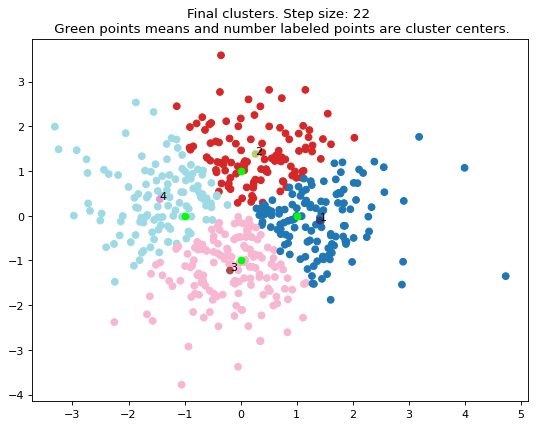

In [105]:
kMeans(dataset=gaussian_mixture, k=4)

## Is the k-means able to correctly cluster the different components of the mixture?
* Yes, it mostly captured clusters. Centroids are a bit further from original points(lime dots), but overall cluster results are perfect.